<a href="https://colab.research.google.com/github/tuboxu/machine-learning/blob/main/%E2%80%9CASD_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Library for handling the operating system and files
import os

# Path to the images
images_dir = "/content/drive/MyDrive/Dataset/"

# Ensure the directory exists
if not os.path.exists(images_dir):
    print(f"The specified directory '{images_dir}' does not exist.")
else:
    # List of class names
    classes = os.listdir(images_dir)

    # Number of classes
    count_classes = len(classes)

    # Display the classes
    classes


Mounted at /content/drive


In [ ]:
# Calculating the distribution of images across classes
total = 0
dict = {}

# Iterating through subfolders
for folder in os.listdir(images_dir):
    # Counting the number of files in the folder
    c_total = len(os.listdir(images_dir + folder))
    # Adding to the dictionary
    dict[folder] = c_total
    # Cumulative total
    total = total + c_total

# Displaying the results
print("Total images: ", total)
print("Count of images in each class: ", dict)


Total images:  329
Count of images in each class:  {'FingersFlipping': 144, 'ArmsMoving': 185}


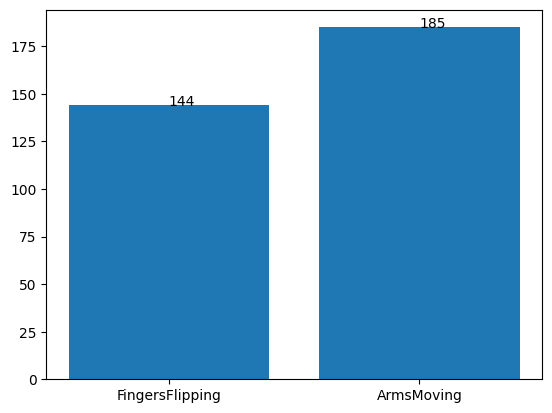

In [ ]:
# Plotting library
import matplotlib.pyplot as plt
import numpy as np

# Classes
classes = list(dict.keys())

# Counts
classes_count = list(dict.values())

# Adding counts on top of the bars
for i in range(len(classes)):
    plt.text(i, classes_count[i], classes_count[i])

# Drawing the bars
plt.bar(range(len(dict)), classes_count, tick_label=classes)
plt.show()


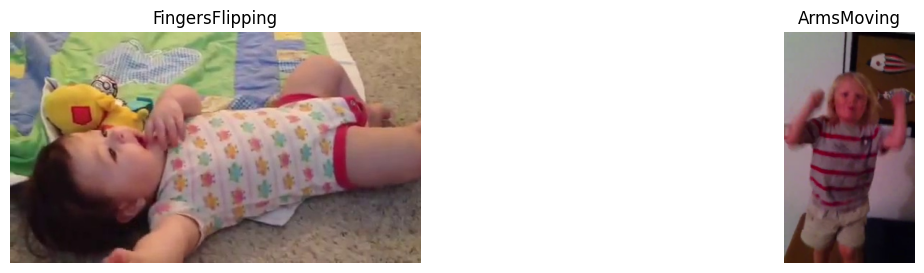

In [ ]:
# Python Imaging Library
# Install Pillow using: pip install Pillow
from PIL import Image

# Creating a figure with one row and five columns
fig, axs = plt.subplots(1, len(classes), figsize=(15, 3))

# Iterating over folders named by classes
for i, class_name in enumerate(classes):
    # List of files in the folder
    class_images = os.listdir(os.path.join(images_dir, class_name))
    # Path of the first image in the folder
    img_path = os.path.join(images_dir, class_name, class_images[0])
    # Load the image
    img = Image.open(img_path)
    # Display the image
    axs[i].imshow(img, cmap='gray')
    # Set the title of the image
    axs[i].set_title(class_name)
    # Turn off the axes
    axs[i].axis('off')

plt.show()


In [ ]:
# Defining the dimensions of the images
Image_Height = 224
Image_Width = 224

# Desired image dimensions
target_size = (Image_Height, Image_Width)


In [ ]:
# List of image file names
image_files = []

# List of corresponding class labels
labels = []

# Populating the lists
for root, dirs, files in os.walk(images_dir):
    for file in files:
        # Checking for image file extensions
        if file.endswith(('.jpg', '.jpeg', '.png')):
            # Adding to the list of file names
            image_files.append(os.path.join(root, file))
            # Adding the class name
            labels.append(os.path.basename(root))


In [ ]:
print(image_files[0])
print(labels[0])

/content/drive/MyDrive/Dataset/FingersFlipping/frame_159.jpg
FingersFlipping


In [ ]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42)


In [ ]:
# Loading and pre-processing an image
def load_and_preprocess_image(image_path, target_size):
    # Load the image
    img = Image.open(image_path)
    # Convert to RGB if not already
    img = img.convert('RGB') if img.mode != 'RGB' else img
    # Resize the image
    img = img.resize(target_size)
    # Convert to a NumPy array and normalize the image
    img = np.array(img) / 255.0
    return img


In [ ]:
# Applying the previous function
X_train_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_train])
X_test_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_test])


In [ ]:
X_train_processed
X_train_processed
#np.shape(X_train_processed)

array([[[[0.70980392, 0.69411765, 0.69803922],
         [0.55686275, 0.54117647, 0.54509804],
         [0.94901961, 0.93333333, 0.94509804],
         ...,
         [0.6745098 , 0.63921569, 0.60392157],
         [0.75686275, 0.7254902 , 0.68235294],
         [0.75294118, 0.72156863, 0.67843137]],

        [[0.70980392, 0.68627451, 0.69411765],
         [0.55686275, 0.54117647, 0.54509804],
         [0.94117647, 0.9254902 , 0.94117647],
         ...,
         [0.70196078, 0.66666667, 0.63529412],
         [0.76470588, 0.72941176, 0.69411765],
         [0.75686275, 0.7254902 , 0.68627451]],

        [[0.70588235, 0.68235294, 0.69411765],
         [0.55686275, 0.5372549 , 0.54509804],
         [0.9372549 , 0.91764706, 0.92941176],
         ...,
         [0.75294118, 0.71764706, 0.69019608],
         [0.74509804, 0.70980392, 0.6745098 ],
         [0.79607843, 0.76078431, 0.7254902 ]],

        ...,

        [[0.41176471, 0.40784314, 0.40392157],
         [0.47058824, 0.4627451 , 0.45882353]

In [ ]:
# Library for class labels encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Encoding test labels
y_test_encoded = label_encoder.transform(y_test)
y_test_encoded


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
# List of class names indexed according to the encoding
classes_labels = []

for i in range(count_classes):
    class_label = label_encoder.inverse_transform([i])
    classes_labels.append(class_label[0])

classes_labels


['ArmsMoving', 'FingersFlipping']

In [ ]:
# Library for converting encoding to categorical
from keras.utils import to_categorical

# Convert training encoding to categorical
y_train_categorical = to_categorical(y_train_encoded)

# Convert test encoding to categorical
y_test_categorical = to_categorical(y_test_encoded)
y_test_categorical


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
# Setting seed for reproducibility
import random
import numpy as np
import tensorflow as tf

# Any number can be used for the seed value
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


In [ ]:
# Importing the VGG16 model from Keras applications
from keras.applications import VGG16

# Loading the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Image_Height, Image_Width, 3))

# Freezing all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

print("Layers: ", len(base_model.layers))
base_model.summary()


58889256/58889256 [==============================] - 2s 0us/step
Layers:  19
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                  

In [ ]:
# Importing necessary modules
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Sequential model
model = Sequential()

# Input layer
model.add(Input(shape=(Image_Height, Image_Width, 3)))

# Adding the pre-trained model
model.add(base_model)

# Flatten layer
model.add(Flatten())

# Dropout layer
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(512, activation='relu'))

# Dropout layer
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(256, activation='relu'))

# Dropout layer
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(128, activation='relu'))

# Dropout layer
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(count_classes, activation='softmax'))

# Configuring the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [ ]:
# Training the model
epochs = 10
history = model.fit(
    X_train_processed,
    y_train_categorical,
    epochs=epochs,
    validation_data=(X_test_processed, y_test_categorical)
)


Epoch 1/10
9/9 [==============================] - 218s 24s/step - loss: 1.5228 - accuracy: 0.5817 - val_loss: 1.2661 - val_accuracy: 0.5606
Epoch 2/10
9/9 [==============================] - 218s 25s/step - loss: 0.8170 - accuracy: 0.6996 - val_loss: 0.1450 - val_accuracy: 0.9242
Epoch 3/10
9/9 [==============================] - 256s 29s/step - loss: 0.3762 - accuracy: 0.8593 - val_loss: 0.0734 - val_accuracy: 0.9545
Epoch 4/10
9/9 [==============================] - 255s 29s/step - loss: 0.2083 - accuracy: 0.9125 - val_loss: 0.0513 - val_accuracy: 0.9848
Epoch 5/10
9/9 [==============================] - 249s 29s/step - loss: 0.1139 - accuracy: 0.9582 - val_loss: 0.0571 - val_accuracy: 0.9697
Epoch 6/10
9/9 [==============================] - 250s 29s/step - loss: 0.0530 - accuracy: 0.9810 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 259s 29s/step - loss: 0.0492 - accuracy: 0.9772 - val_loss: 0.0223 - val_accuracy: 0.9848
Epoch 8/10
9/9 [====

In [ ]:
# Evaluating the model

score = model.evaluate(X_test_processed, y_test_categorical)
print('Test accuracy:', round(score[1] * 100, 2))


3/3 [==============================] - 56s 11s/step - loss: 3.3757e-05 - accuracy: 1.0000
Test accuracy: 100.0


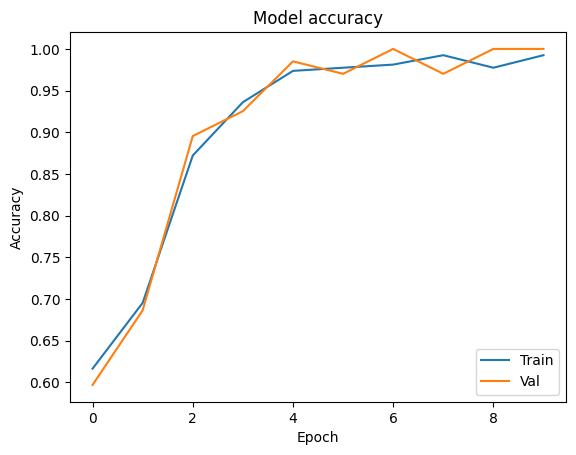

In [ ]:
# Visualizing training and validation accuracy over epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [ ]:
# Making predictions on the evaluation data
y_pred = model.predict(X_test_processed)


3/3 [==============================] - 42s 11s/step


In [ ]:
# Converting from class probabilities to their encoding
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1])

In [ ]:
# Finding class labels corresponding to the encodings
pred_class_labels = []
for c in y_pred:
    pred_class_labels.append(label_encoder.inverse_transform([c])[0])

pred_class_labels


['FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'ArmsMoving',
 'ArmsMoving',
 'FingersFlipping',
 'FingersFlipping',
 'ArmsMoving',
 'FingersFlipping',
 'FingersF

In [ ]:
# Importing confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred_class_labels)
cm


array([[36,  0],
       [ 0, 31]])

In [ ]:
# Importing ConfusionMatrixDisplay and matplotlib.pyplot
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Drawing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_labels)
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size as needed

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)

# Rotating the labels on the horizontal axis vertically
ax.set_xticklabels(classes_labels, rotation=90)

plt.title('Confusion Matrix')
plt.show()


NameError: ignored

In [ ]:
# Save the model to a file
model.save('ASD.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
